# Feature Extraction

### Library Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, variance

### Load Audio File

In [35]:
import librosa

audio_file = '../song_samples/genres_original/pop/pop.00000.wav'# Path de la canción
x, sr = librosa.load(audio_file)

### Chroma Frequencies

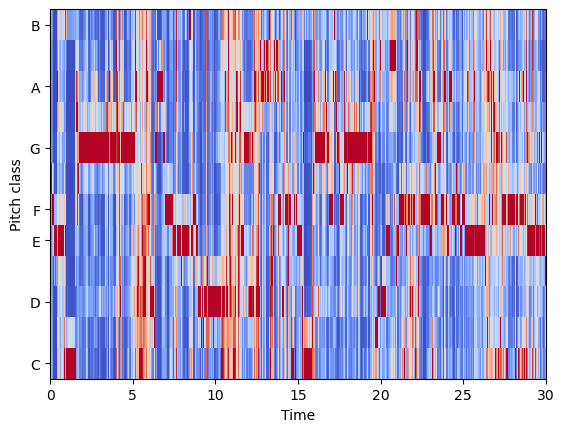

In [36]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=512)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
chrm_mean = mean(chromagram.flatten())
chrm_var = variance(chromagram.flatten(), xbar=chrm_mean)

### Root Mean Square

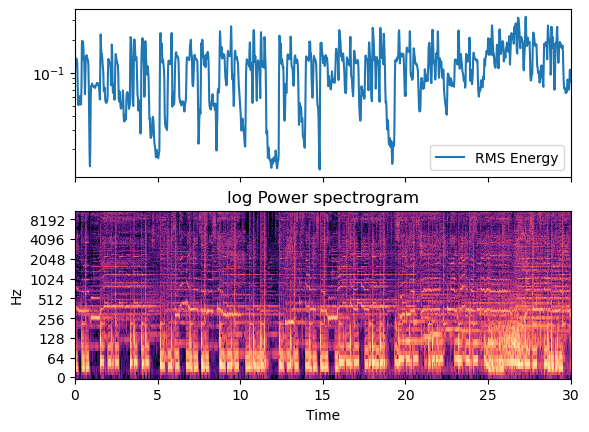

In [37]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

rms_mean = mean(rms.flatten())
rms_var = variance(rms.flatten(), xbar=rms_mean)

### Spectral Centroid

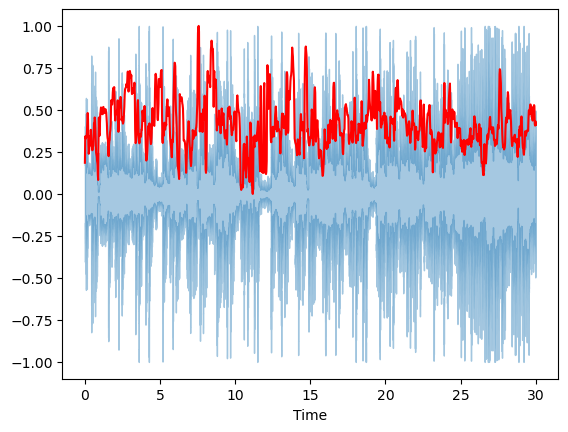

In [38]:
from sklearn import preprocessing

spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroid.shape

t = librosa.frames_to_time(range(len(spectral_centroid)))

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, preprocessing.minmax_scale(spectral_centroid,axis=0),color='r')

spectc_mean = mean(spectral_centroid.flatten())
spectc_var = variance(spectral_centroid.flatten(),xbar=spectc_mean)

### Spectral Bandwidth

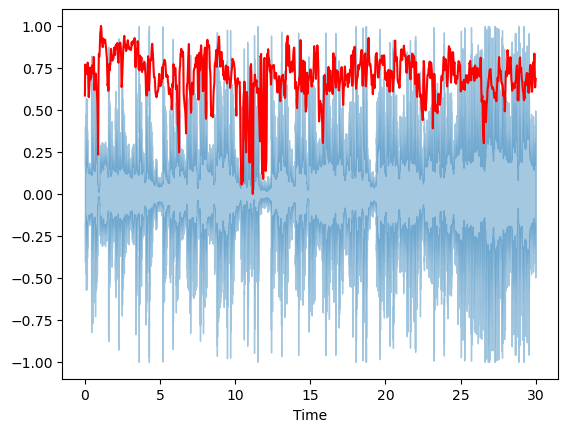

In [39]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=x, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, preprocessing.minmax_scale(spectral_bandwidth,axis=0),color='r')

spectbw_mean = mean(spectral_bandwidth.flatten())
spectbw_var = variance(spectral_bandwidth.flatten(),xbar=spectbw_mean)

### Spectral Rolloff

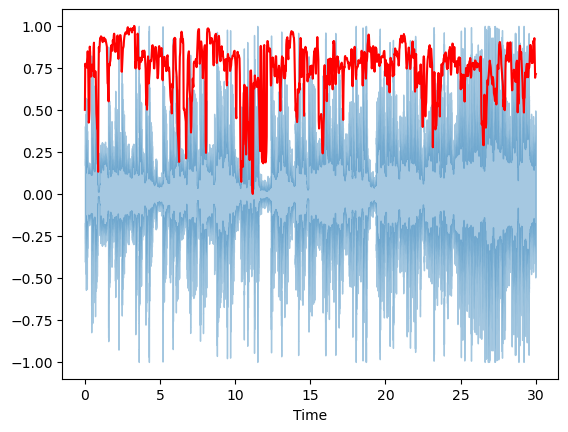

In [40]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, preprocessing.minmax_scale(spectral_rolloff,axis=0), color='r')

spectro_mean = mean(spectral_rolloff.flatten())
spectro_var = variance(spectral_rolloff.flatten(), xbar=spectro_mean)

### Zero Crossing Rate


 Number of crossings found: 15


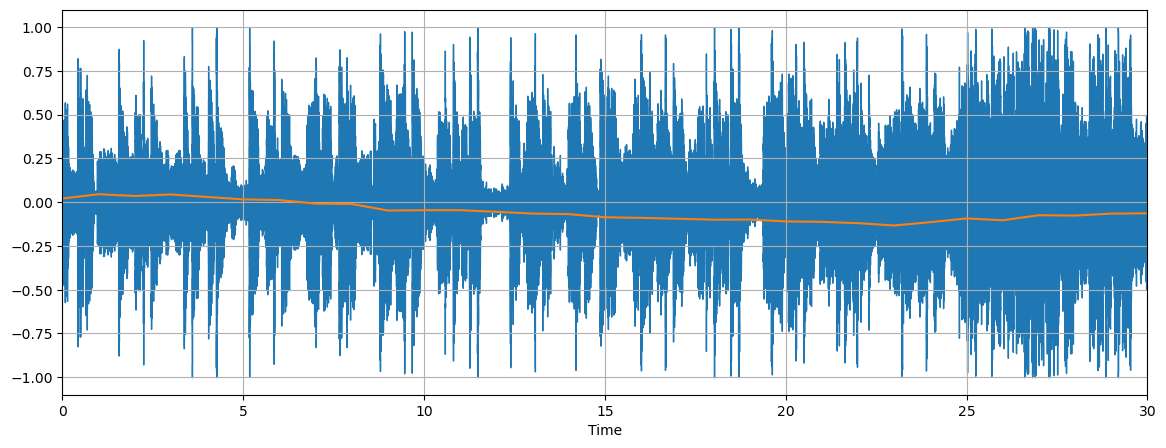

In [41]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)
plt.plot(x[9000:9100])
plt.grid()
plt.xlim([0,30])
zero_crossing = librosa.feature.zero_crossing_rate(x)


zeroc_mean = mean(zero_crossing.flatten())
zeroc_var = variance(zero_crossing.flatten(), xbar=zeroc_mean)

print(f'\n Number of crossings found: {sum(librosa.zero_crossings(x[9000:9100], pad=False))}')

### Harmonics and Perceptual

-1.9351677e-05
0.02534099599208979


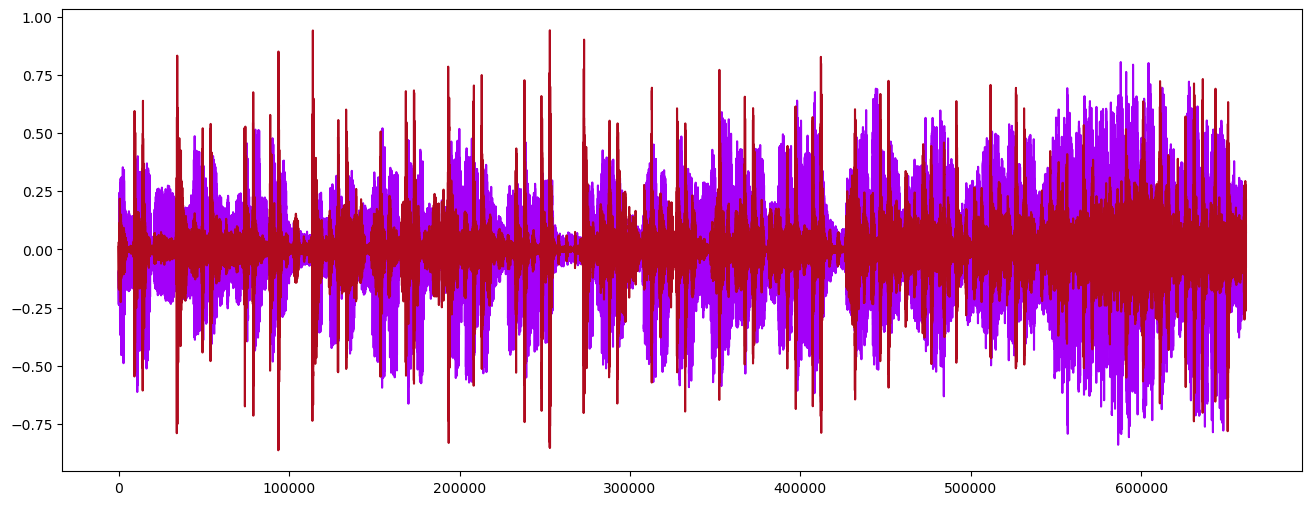

In [42]:
y_harm, y_perc = librosa.effects.hpss(x)

harm_mean = mean(y_harm)
harm_var = variance(y_harm, xbar=harm_mean)

perc_mean = mean(y_perc)
perc_var = variance(y_perc, xbar=perc_mean)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color = '#A300F9')
plt.plot(y_perc, color = '#B00B1E')

print(harm_mean)
print(harm_var)

### Tempo

In [43]:
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
tempo =  np.floor(tempo).astype(int)
print(tempo[0])

135


### Mel-Frequency Cepstral Coefficient

(20, 1293)


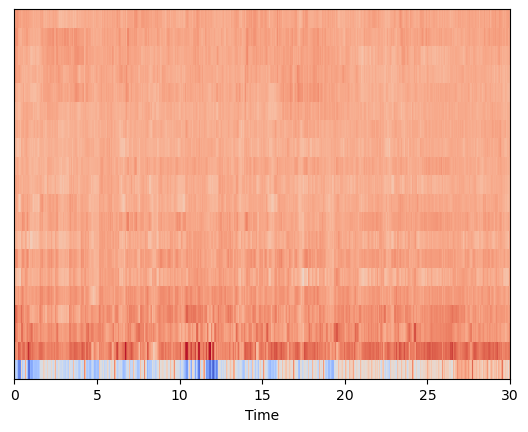

In [44]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)
mfcc_feat = librosa.feature.mfcc(y=x, sr=sr)
print(mfcc_feat.shape)

librosa.display.specshow(mfcc_feat, sr=sr, x_axis='time')

mfcc = {}


for i, mfccs in enumerate(mfcc_feat):
    mfcc['mfcc'+str(i+1)+'_mean'] = mean(mfccs.flatten())
    mfcc['mfcc'+str(i+1)+'_var'] = variance(mfccs.flatten(), xbar=mfcc['mfcc'+str(i+1)+'_mean'])    

### Notebook Exports

In [45]:
import pickle
import pandas as pd

with open('pkl/df.pkl', 'rb') as f:
    df = pickle.load(f)

feature_names = np.array([header for header in df.columns if header != 'label'])


X_values = [chrm_mean, chrm_var, rms_mean, rms_var, spectc_mean, spectc_var, spectbw_mean, spectbw_var, spectro_mean, spectro_var, zeroc_mean, zeroc_var, harm_mean, harm_var, perc_mean, perc_var, tempo[0]]

for value in mfcc.values():
    X_values.append(value)


X_values = np.array(X_values)

X_pred = pd.DataFrame([X_values], columns=feature_names)

with open('pkl/X_pred.pkl', 'wb') as f:
    pickle.dump(X_pred, f)



   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.389654         0.090939  0.111941  0.003238   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             3422.071864           1.080954e+06              3409.782871   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_mean  \
0            163831.40115   7923.177895  2.747277e+06  ...     3.116903   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0  112.590944     2.504271   92.478761     4.100273  112.956739      9.17729   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   87.664001     4.741726    88.65093  

[1 rows x 57 columns]
